<IPython.core.display.Javascript object>


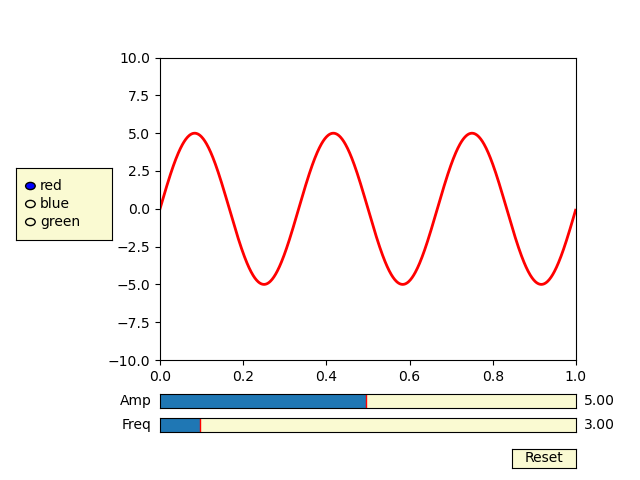

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from six.moves import input
from matplotlib.widgets import LassoSelector
from matplotlib.path import Path
from matplotlib.widgets import Slider, Button, RadioButtons, CheckButtons, Cursor,RectangleSelector
import matplotlib.colors as colors
import matplotlib.patches as patches
import matplotlib.mathtext as mathtext
import matplotlib.pyplot as plt
import matplotlib.artist as artist
import matplotlib.image as image


fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
t = np.arange(0.0, 1.0, 0.001)
a0 = 5
f0 = 3
s = a0*np.sin(2*np.pi*f0*t)
l, = plt.plot(t, s, lw=2, color='red')
plt.axis([0, 1, -10, 10])

axcolor = 'lightgoldenrodyellow'
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
axamp = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)

sfreq = Slider(axfreq, 'Freq', 0.1, 30.0, valinit=f0)
samp = Slider(axamp, 'Amp', 0.1, 10.0, valinit=a0)


def update(val):
    amp = samp.val
    freq = sfreq.val
    l.set_ydata(amp*np.sin(2*np.pi*freq*t))
    fig.canvas.draw_idle()
sfreq.on_changed(update)
samp.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')


def reset(event):
    sfreq.reset()
    samp.reset()
button.on_clicked(reset)

rax = plt.axes([0.025, 0.5, 0.15, 0.15], facecolor=axcolor)
radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)


def colorfunc(label):
    l.set_color(label)
    fig.canvas.draw_idle()
radio.on_clicked(colorfunc)

plt.show()

<IPython.core.display.Javascript object>


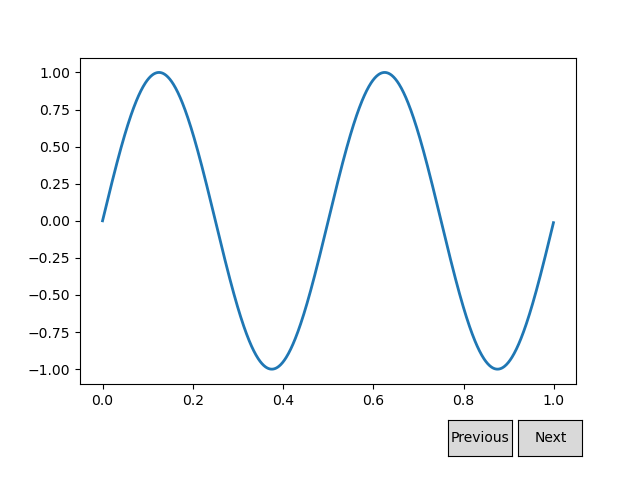

In [2]:
freqs = np.arange(2, 20, 3)

fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.2)
t = np.arange(0.0, 1.0, 0.001)
s = np.sin(2*np.pi*freqs[0]*t)
l, = plt.plot(t, s, lw=2)


class Index(object):
    ind = 0

    def next(self, event):
        self.ind += 1
        i = self.ind % len(freqs)
        ydata = np.sin(2*np.pi*freqs[i]*t)
        l.set_ydata(ydata)
        plt.draw()

    def prev(self, event):
        self.ind -= 1
        i = self.ind % len(freqs)
        ydata = np.sin(2*np.pi*freqs[i]*t)
        l.set_ydata(ydata)
        plt.draw()

callback = Index()
axprev = plt.axes([0.7, 0.05, 0.1, 0.075])
axnext = plt.axes([0.81, 0.05, 0.1, 0.075])
bnext = Button(axnext, 'Next')
bnext.on_clicked(callback.next)
bprev = Button(axprev, 'Previous')
bprev.on_clicked(callback.prev)

plt.show()

<IPython.core.display.Javascript object>


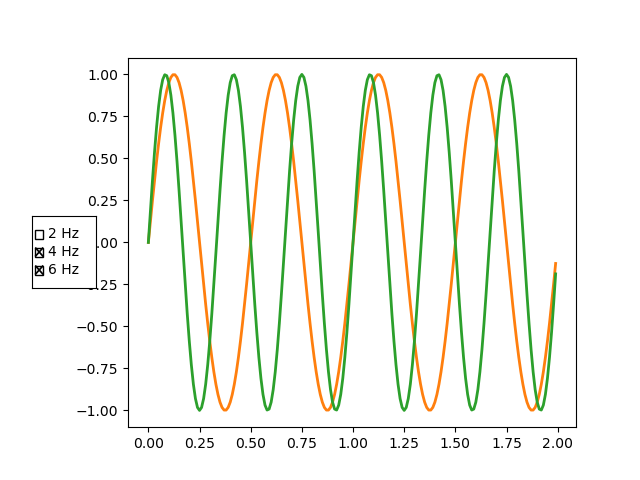

In [3]:
t = np.arange(0.0, 2.0, 0.01)
s0 = np.sin(2*np.pi*t)
s1 = np.sin(4*np.pi*t)
s2 = np.sin(6*np.pi*t)

fig, ax = plt.subplots()
l0, = ax.plot(t, s0, visible=False, lw=2)
l1, = ax.plot(t, s1, lw=2)
l2, = ax.plot(t, s2, lw=2)
plt.subplots_adjust(left=0.2)

rax = plt.axes([0.05, 0.4, 0.1, 0.15])
check = CheckButtons(rax, ('2 Hz', '4 Hz', '6 Hz'), (False, True, True))


def func(label):
    if label == '2 Hz':
        l0.set_visible(not l0.get_visible())
    elif label == '4 Hz':
        l1.set_visible(not l1.get_visible())
    elif label == '6 Hz':
        l2.set_visible(not l2.get_visible())
    plt.draw()
check.on_clicked(func)

plt.show()

<IPython.core.display.Javascript object>


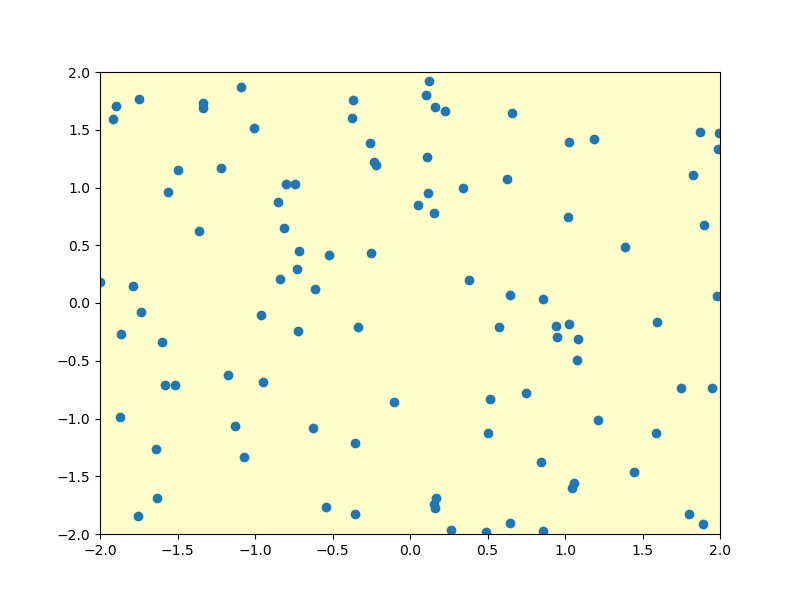

In [4]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, facecolor='#FFFFCC')

x, y = 4*(np.random.rand(2, 100) - .5)
ax.plot(x, y, 'o')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)

# set useblit = True on gtkagg for enhanced performance
cursor = Cursor(ax, useblit=True, color='red', linewidth=2)

plt.show()

<IPython.core.display.Javascript object>


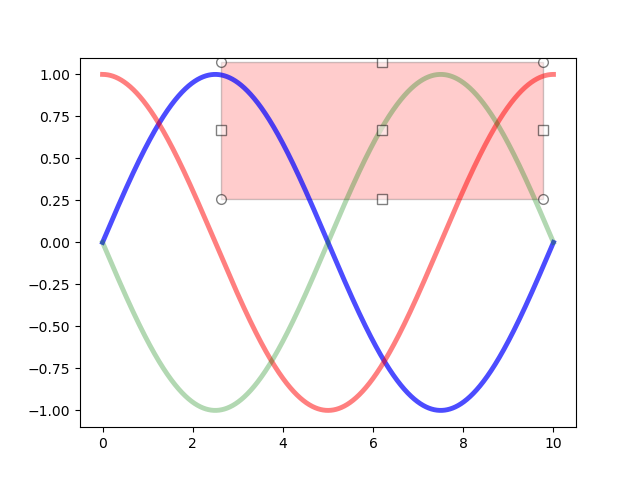


      click  -->  release


In [5]:
def line_select_callback(eclick, erelease):
    'eclick and erelease are the press and release events'
    x1, y1 = eclick.xdata, eclick.ydata
    x2, y2 = erelease.xdata, erelease.ydata
    print("(%3.2f, %3.2f) --> (%3.2f, %3.2f)" % (x1, y1, x2, y2))
    print(" The button you used were: %s %s" % (eclick.button, erelease.button))


def toggle_selector(event):
    print(' Key pressed.')
    if event.key in ['Q', 'q'] and toggle_selector.RS.active:
        print(' RectangleSelector deactivated.')
        toggle_selector.RS.set_active(False)
    if event.key in ['A', 'a'] and not toggle_selector.RS.active:
        print(' RectangleSelector activated.')
        toggle_selector.RS.set_active(True)


fig, current_ax = plt.subplots()                 # make a new plotting range
N = 100000                                       # If N is large one can see
x = np.linspace(0.0, 10.0, N)                    # improvement by use blitting!

plt.plot(x, +np.sin(.2*np.pi*x), lw=3.5, c='b', alpha=.7)  # plot something
plt.plot(x, +np.cos(.2*np.pi*x), lw=3.5, c='r', alpha=.5)
plt.plot(x, -np.sin(.2*np.pi*x), lw=3.5, c='g', alpha=.3)

print("\n      click  -->  release")

# drawtype is 'box' or 'line' or 'none'
toggle_selector.RS = RectangleSelector(current_ax, line_select_callback,
                                       drawtype='box', useblit=True,
                                       button=[1, 3],  # don't use middle button
                                       minspanx=5, minspany=5,
                                       spancoords='pixels',
                                       interactive=True)
plt.connect('key_press_event', toggle_selector)
plt.show()

<IPython.core.display.Javascript object>


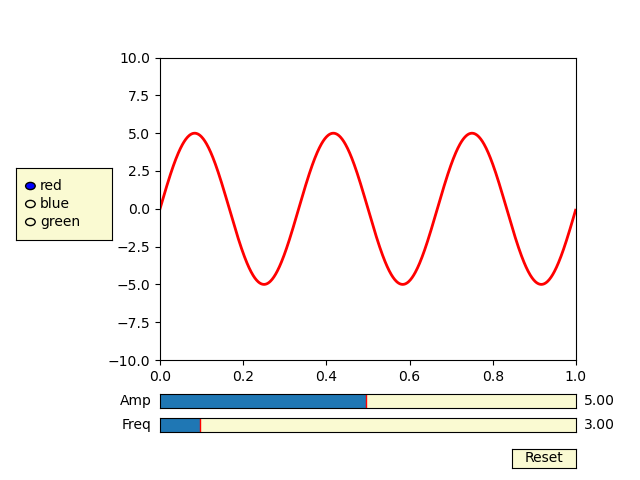

In [6]:
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
t = np.arange(0.0, 1.0, 0.001)
a0 = 5
f0 = 3
s = a0*np.sin(2*np.pi*f0*t)
l, = plt.plot(t, s, lw=2, color='red')
plt.axis([0, 1, -10, 10])

axcolor = 'lightgoldenrodyellow'
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
axamp = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)

sfreq = Slider(axfreq, 'Freq', 0.1, 30.0, valinit=f0)
samp = Slider(axamp, 'Amp', 0.1, 10.0, valinit=a0)


def update(val):
    amp = samp.val
    freq = sfreq.val
    l.set_ydata(amp*np.sin(2*np.pi*freq*t))
    fig.canvas.draw_idle()
sfreq.on_changed(update)
samp.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')


def reset(event):
    sfreq.reset()
    samp.reset()
button.on_clicked(reset)

rax = plt.axes([0.025, 0.5, 0.15, 0.15], facecolor=axcolor)
radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)


def colorfunc(label):
    l.set_color(label)
    fig.canvas.draw_idle()
radio.on_clicked(colorfunc)

plt.show()